### Bank Customer Churn Prediction with Deep Learning (ANN)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Data Preprocessing

In [2]:
# Read Data
churn_df = pd.read_csv('Churn_Modelling.csv')
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# shape of the data
churn_df.shape

(10000, 14)

In [4]:
# data types
churn_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
# Missing values check
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Drop the RowNumber, CustomerID and Surname columns - they do no add any value in modelling
churn_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [7]:
# separate the input features and the target
# input 
X = churn_df.drop(['Exited'], axis = 1)

# target
y = churn_df['Exited']

In [8]:
# One hot encoding of the categorical inputs
X = pd.get_dummies(X, drop_first=True)

X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


#### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
# shape of train and test data
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

#### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\abyanjan.FSE17-32\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abyanjan.FSE17-32\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\abyanjan.FSE17-32\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [12]:
# convert the target to array for ANN
y_train = y_train.to_numpy()


### Build ANN

In [14]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [16]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dropout( 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.1))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [17]:
# compile the ANN
classifier.compile(optimizer="adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
# fit the ANN to the train data
classifier.fit(X_train, y_train, epochs = 100 , batch_size = 10,validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
6400/6400 [==============================] - 7s 1ms/sample - loss: 0.4957 - accuracy: 0.7953 - val_loss: 0.4362 - val_accuracy: 0.7969
Epoch 2/100
6400/6400 [==============================] - 5s 707us/sample - loss: 0.4338 - accuracy: 0.7958 - val_loss: 0.4314 - val_accuracy: 0.7969
Epoch 3/100
6400/6400 [==============================] - 5s 836us/sample - loss: 0.4312 - accuracy: 0.7958 - val_loss: 0.4277 - val_accuracy: 0.7969
Epoch 4/100
6400/6400 [==============================] - 5s 768us/sample - loss: 0.4287 - accuracy: 0.7958 - val_loss: 0.4254 - val_accuracy: 0.7969
Epoch 5/100
6400/6400 [==============================] - 6s 899us/sample - loss: 0.4285 - accuracy: 0.7958 - val_loss: 0.4239 - val_accuracy: 0.7969
Epoch 6/100
6400/6400 [==============================] - 5s 857us/sample - loss: 0.4265 - accuracy: 0.8094 - val_lo

6400/6400 [==============================] - 5s 769us/sample - loss: 0.4090 - accuracy: 0.8316 - val_loss: 0.4099 - val_accuracy: 0.8281
Epoch 49/100
6400/6400 [==============================] - 5s 775us/sample - loss: 0.4086 - accuracy: 0.8283 - val_loss: 0.4103 - val_accuracy: 0.8281
Epoch 50/100
6400/6400 [==============================] - 5s 784us/sample - loss: 0.4085 - accuracy: 0.8341 - val_loss: 0.4088 - val_accuracy: 0.8294
Epoch 51/100
6400/6400 [==============================] - 5s 782us/sample - loss: 0.4110 - accuracy: 0.8297 - val_loss: 0.4083 - val_accuracy: 0.8306
Epoch 52/100
6400/6400 [==============================] - 5s 762us/sample - loss: 0.4059 - accuracy: 0.8316 - val_loss: 0.4100 - val_accuracy: 0.8281
Epoch 53/100
6400/6400 [==============================] - 6s 997us/sample - loss: 0.4096 - accuracy: 0.8286 - val_loss: 0.4102 - val_accuracy: 0.8269
Epoch 54/100
6400/6400 [==============================] - 5s 833us/sample - loss: 0.4112 - accuracy: 0.8300 - val

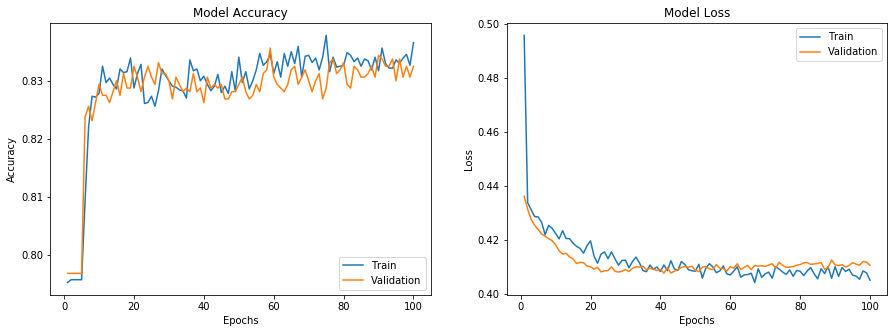

In [20]:
# Learning  Curve
epoch_range = range(1,101)
fig = plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(epoch_range, classifier.history.history['accuracy'], label = "Train")
plt.plot(epoch_range, classifier.history.history['val_accuracy'], label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch_range, classifier.history.history['loss'], label = "Train")
plt.plot(epoch_range, classifier.history.history['val_loss'], label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()

In [22]:
# Prediction on test set
y_pred = classifier.predict(X_test)
y_pred

array([[0.2785024 ],
       [0.30308276],
       [0.19287866],
       ...,
       [0.17379755],
       [0.14931646],
       [0.17029232]], dtype=float32)

In [23]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score

#  predictions to classes
y_pred_class = classifier.predict_classes(X_test)

confusion_matrix(y_test, y_pred_class)

array([[1550,   45],
       [ 271,  134]], dtype=int64)

In [24]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1595
           1       0.75      0.33      0.46       405

   micro avg       0.84      0.84      0.84      2000
   macro avg       0.80      0.65      0.68      2000
weighted avg       0.83      0.84      0.82      2000



In [25]:
# Accuracy
accuracy_score(y_test, y_pred_class)

0.842

In [26]:
# AUC score
roc_auc_score(y_test, y_pred)

0.7994272224157282

### Tuning the ANN

In [27]:
# Tuning the ANN
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# define classifier
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier)



In [28]:
# parameters
parameters = {'batch_size': [25, 32],
              'epochs': [100, 250],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)


Train on 8000 samples
Epoch 1/250
8000/8000 [==============================] - 2s 284us/sample - loss: 0.5961 - accuracy: 0.7945
Epoch 2/250
8000/8000 [==============================] - 2s 200us/sample - loss: 0.4494 - accuracy: 0.7960
Epoch 3/250
8000/8000 [==============================] - 2s 200us/sample - loss: 0.4346 - accuracy: 0.7960
Epoch 4/250
8000/8000 [==============================] - 2s 208us/sample - loss: 0.4302 - accuracy: 0.7960
Epoch 5/250
8000/8000 [==============================] - 2s 224us/sample - loss: 0.4276 - accuracy: 0.7960
Epoch 6/250
8000/8000 [==============================] - 2s 227us/sample - loss: 0.4253 - accuracy: 0.7960
Epoch 7/250
8000/8000 [==============================] - 2s 234us/sample - loss: 0.4227 - accuracy: 0.7960
Epoch 8/250
8000/8000 [==============================] - 2s 271us/sample - loss: 0.4200 - accuracy: 0.8079
Epoch 9/250
8000/8000 [==============================] - 2s 277us/sample - loss: 0.4183 - accuracy: 0.8206
Epoch 10/250
80

8000/8000 [==============================] - 2s 221us/sample - loss: 0.4019 - accuracy: 0.8347
Epoch 70/250
8000/8000 [==============================] - 2s 205us/sample - loss: 0.4017 - accuracy: 0.8349
Epoch 71/250
8000/8000 [==============================] - 2s 198us/sample - loss: 0.4017 - accuracy: 0.8344
Epoch 72/250
8000/8000 [==============================] - 2s 199us/sample - loss: 0.4016 - accuracy: 0.8347
Epoch 73/250
8000/8000 [==============================] - 2s 211us/sample - loss: 0.4016 - accuracy: 0.8365
Epoch 74/250
8000/8000 [==============================] - 2s 267us/sample - loss: 0.4015 - accuracy: 0.8361
Epoch 75/250
8000/8000 [==============================] - 2s 280us/sample - loss: 0.4014 - accuracy: 0.8350
Epoch 76/250
8000/8000 [==============================] - 2s 226us/sample - loss: 0.4013 - accuracy: 0.8359
Epoch 77/250
8000/8000 [==============================] - 2s 227us/sample - loss: 0.4014 - accuracy: 0.8342
Epoch 78/250
8000/8000 [=================

8000/8000 [==============================] - 2s 224us/sample - loss: 0.3989 - accuracy: 0.8365
Epoch 144/250
8000/8000 [==============================] - 2s 209us/sample - loss: 0.3991 - accuracy: 0.8350
Epoch 145/250
8000/8000 [==============================] - 2s 196us/sample - loss: 0.3992 - accuracy: 0.8364
Epoch 146/250
8000/8000 [==============================] - 2s 208us/sample - loss: 0.3988 - accuracy: 0.8359
Epoch 147/250
8000/8000 [==============================] - 2s 207us/sample - loss: 0.3989 - accuracy: 0.8372
Epoch 148/250
8000/8000 [==============================] - 2s 222us/sample - loss: 0.3992 - accuracy: 0.8372
Epoch 149/250
8000/8000 [==============================] - 2s 228us/sample - loss: 0.3989 - accuracy: 0.8379
Epoch 150/250
8000/8000 [==============================] - 2s 232us/sample - loss: 0.3990 - accuracy: 0.8360
Epoch 151/250
8000/8000 [==============================] - 2s 263us/sample - loss: 0.3989 - accuracy: 0.8365
Epoch 152/250
8000/8000 [========

8000/8000 [==============================] - 2s 215us/sample - loss: 0.3987 - accuracy: 0.8378
Epoch 218/250
8000/8000 [==============================] - 2s 221us/sample - loss: 0.3986 - accuracy: 0.8371
Epoch 219/250
8000/8000 [==============================] - 2s 217us/sample - loss: 0.3984 - accuracy: 0.8376
Epoch 220/250
8000/8000 [==============================] - 2s 218us/sample - loss: 0.3983 - accuracy: 0.8356
Epoch 221/250
8000/8000 [==============================] - 2s 211us/sample - loss: 0.3985 - accuracy: 0.8355
Epoch 222/250
8000/8000 [==============================] - 2s 237us/sample - loss: 0.3985 - accuracy: 0.8364
Epoch 223/250
8000/8000 [==============================] - 2s 224us/sample - loss: 0.3988 - accuracy: 0.8371
Epoch 224/250
8000/8000 [==============================] - 2s 212us/sample - loss: 0.3986 - accuracy: 0.8370
Epoch 225/250
8000/8000 [==============================] - 2s 227us/sample - loss: 0.3988 - accuracy: 0.8369
Epoch 226/250
8000/8000 [========

In [29]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print('Best Parameters:', best_parameters)
print('Best Scores:', best_accuracy)

Best Parameters: {'batch_size': 32, 'epochs': 250, 'optimizer': 'rmsprop'}
Best Scores: 0.850125
